# Examples

Models for examples should be downloaded manually, or just run `prepare_and_run_tests.sh`

For actual code, please refer to python modules, from where model classes were imported

## RateMe is a YOLO3 example

It trained to detect like/dislike gestures

https://github.com/heyml/rateme

In [1]:
import cv2
from skimage import io
import matplotlib.pyplot as plt

from rateme.utils import RateMe

In [2]:
model = RateMe()
img = cv2.imread('dislike.jpg')
model.predict(img)
#'dislike'

'dislike'

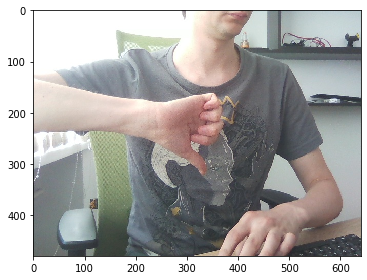

In [3]:
# show original RGB image
io.imshow(img[::,::,::-1])

## Text detection and recognition pipeline

PixelLink (text detector):
+ [description](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/intel/text-detection-0004/description/text-detection-0004.md)
+ [original article](https://arxiv.org/abs/1801.01315)

Text Recognizer (BiLSTM + VGG16):
+ [description](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/intel/text-recognition-0012/description/text-recognition-0012.md)

> The network output can be decoded by CTC Greedy Decoder or CTC Beam Search decoder

For that I used TensorFlow but it is to heavy for test (see older versions of the `text_recognition.py` or docstring of `TextRecognizer.do_ocr()`).
But simple `np.argmax()` with dropping spaces is enough (greedy decoder), because we are assuming that we are working with separate words only, thus all blanks could be skipped.

### Text detection

In [4]:
import cv2
import numpy as np
from pixellink import PixelLinkDetector

img = cv2.imread('helloworld.png')
detector = PixelLinkDetector('text-detection-0004.xml')
detector.detect(img)
bboxes = detector.decode()

#### Text detection output

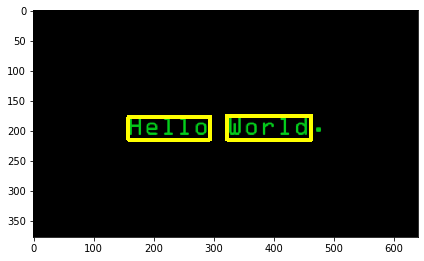

In [5]:
tmp = img.copy()
for b in bboxes:
    cv2.rectangle(tmp, (b[1], b[0]), (b[3], b[2]), (255, 255, 0), 5)
io.imshow(tmp)

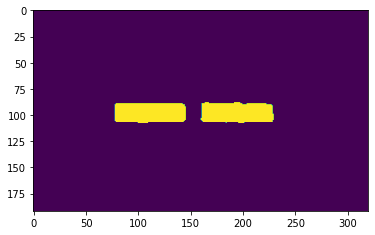

In [6]:
# text mask, from which bounding boxes were calculated
plt.imshow(detector.get_mask())

### Text recognition

In [7]:
from text_recognition import TextRecognizer

recognizer = TextRecognizer('./text-recognition-0012.xml')
recognizer.do_ocr(img, bboxes)
# ['hello', 'world']

['hello', 'world']